In [ ]:
!pip install utils
!pip install python-utils
!pip install category_encoders

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns
import category_encoders as ce
from category_encoders.one_hot import OneHotEncoder, OrdinalEncoder
from sklearn.linear_model import LinearRegression
import plotly.express as px
from matplotlib.pyplot import figure, show
from seaborn import countplot
%matplotlib inline
acidentes_aereos = pd.read_excel('/content/drive/MyDrive/CENIPA/ocorrencias_cenipa.xlsx')
acidentes_aereos.head()



/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning:

pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.



,codigo,tipo,descricao,cidade,estado,data,ano,hora,aeronave_liberada,status_investigacao,aeronaves_envolvidas,ocorrencia_saida_pista,aeronave_tipo,aeronave_fabricante,motor_tipo,aeronave_motor_quantidade,aeronave_assentos,aeronave_ano_fabricacao,aeronave_pais_fabricante,aeronave_fase_operacao,aeronave_nivel_dano
0,40107,ACIDENTE,COLISÃO COM OBSTÁCULO DURANTE A DECOLAGEM E POUSO,GURUPÁ,PA,2010-01-12,2010,14:30:00,SIM,FINALIZADA,1,NÃO,AVIÃO,NEIVA INDUSTRIA AERONAUTICA,PISTÃO,MONOMOTOR,7,1977,BRASIL,POUSO,LEVE
1,40147,ACIDENTE,FALHA OU MAU FUNCIONAMENTO DE SISTEMA / COMPON...,UNIÃO DA VITÓRIA,PR,2010-04-08,2010,14:20:00,SIM,FINALIZADA,1,SIM,AVIÃO,PIPER AIRCRAFT,PISTÃO,BIMOTOR,6,1997,BRASIL,POUSO,SUBSTANCIAL
2,40148,ACIDENTE,PANE SECA,CAMPO GRANDE,MS,2010-03-19,2010,19:30:00,SIM,FINALIZADA,1,NÃO,AVIÃO,CESSNA AIRCRAFT,PISTÃO,MONOMOTOR,6,1962,BRASIL,APROXIMAÇÃO FINAL,SUBSTANCIAL
3,40149,ACIDENTE,FALHA DO MOTOR EM VOO,LUZIÂNIA,GO,2010-03-21,2010,20:45:00,SIM,FINALIZADA,1,NÃO,AVIÃO,XAVANTE,PISTÃO,MONOMOTOR,2,1974,BRASIL,DECOLAGEM,DESTRUÍDA
4,40150,INCIDENTE GRAVE,COM TREM DE POUSO,SANTA MARIA,RS,2010-03-10,2010,17:20:00,SIM,FINALIZADA,1,NÃO,AVIÃO,BEECH AIRCRAFT,PISTÃO,MONOMOTOR,6,1974,BRASIL,POUSO,LEVE


### Quantidade de tipos de acidentes

In [ ]:
for acda in acidentes_aereos['tipo'].unique():
  print(acda +' :' + 
        str(acidentes_aereos['tipo'][acidentes_aereos['tipo']== acda].count()))
  

ACIDENTE :1694
INCIDENTE GRAVE :661
INCIDENTE :2887


In [ ]:
 acidentes_aereos_fab = {}

for acda in acidentes_aereos['aeronave_pais_fabricante'].unique():
    
    acidentes_aereos_fab[acda] = acidentes_aereos['aeronave_pais_fabricante'][
                               acidentes_aereos['aeronave_pais_fabricante'] == acda
                                ].count()  /acidentes_aereos['aeronave_pais_fabricante'].count()
    
fabricante_acda = pd.Series(acidentes_aereos_fab)

fabricante_acda.head(5)

BRASIL            0.980351
ESTADOS UNIDOS    0.009348
PARAGUAI          0.001526
BOLÍVIA           0.000763
PANAMÁ            0.000382
dtype: float64

Para fazer esse levantamento acima foi utilizado uma biblioteca chamada Pandas, que é um pacote Python que fornece estruturas de dados rápidas, flexíveis e expressivas projetadas para tornar o trabalho com dados "relacionais" ou "rotulados" fácil e intuitivo (Visão geral do pacote Pandas, 2011). E com os dados apresentado neste levantamento, conclui-se que os aviões fabricados no Brasil são os que mais têm participado/causado de acidentes aéreos.

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
acidentes_aereos_tipo = {}

for acda in acidentes_aereos['tipo'].unique():
    
    acidentes_aereos_tipo[acda] = acidentes_aereos['tipo'][
                               acidentes_aereos['tipo'] == acda
                                ].count()  /acidentes_aereos['tipo'].count()
    
tipo_acda = pd.Series(acidentes_aereos_tipo)

tipo_acda.head(10)

ACIDENTE           0.323159
INCIDENTE GRAVE    0.126097
INCIDENTE          0.550744
dtype: float64

### Média, Moda, Media e Desvio Padrão

In [ ]:
tipo_acda.describe()

count    3.000000
mean     0.333333
std      0.212506
min      0.126097
25%      0.224628
50%      0.323159
75%      0.436952
max      0.550744
dtype: float64

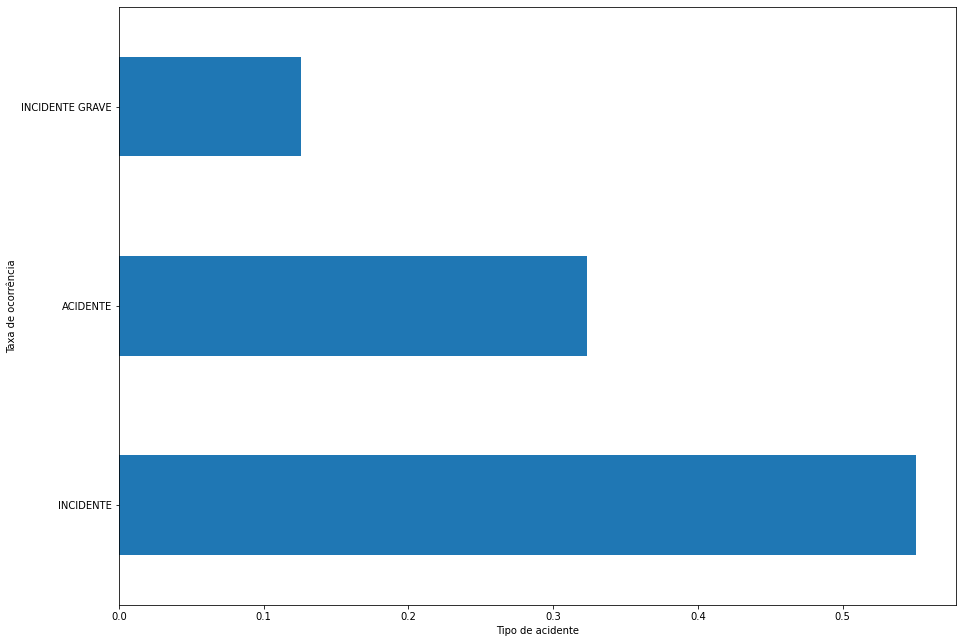

In [ ]:
fig, axes = plt.subplots(figsize=(15,11))

tipo_acda.sort_values(ascending=False).plot(kind='barh')

axes.set_xlabel('Tipo de acidente')
axes.set_ylabel('Taxa de ocorrência')
                   
plt.show()
plt.close()

No gráfico acima foi utilizado a biblioteca Matplotlib, que é uma biblioteca abrangente para criar visualizações estáticas, animadas e interativas em Python(Matplotlib Documentação, 2021).

Descrição dos acidentes

In [ ]:
# print(acidentes_aereos['descricao'].unique())
for acda in acidentes_aereos['descricao'].unique():
  print(acda +' :' + 
        str(acidentes_aereos['descricao'][acidentes_aereos['descricao']== acda].count()))

COLISÃO COM OBSTÁCULO DURANTE A DECOLAGEM E POUSO :168
FALHA OU MAU FUNCIONAMENTO DE SISTEMA / COMPONENTE :540
PANE SECA :96
FALHA DO MOTOR EM VOO :632
COM TREM DE POUSO :291
ESTOURO DE PNEU :566
OUTROS :314
TRÁFEGO AÉREO :120
FALHA DO MOTOR NO SOLO :25
POUSO EM LOCAL NÃO PREVISTO :99
VAZAMENTO DE OUTROS FLUIDOS :55
COLISÃO COM AVE :271
PERDA DE CONTROLE NO SOLO :427
PERDA DE CONTROLE EM VOO :333
COLISÃO COM OBSTÁCULOS NO SOLO :100
POUSO SEM TREM :85
FOGO NO SOLO :21
VAZAMENTO DE COMBUSTÍVEL :16
FOGO EM VOO :7
SUPERAQUECIMENTO :14
POUSO ANTES DA PISTA :14
POUSO BRUSCO :93
OPERAÇÃO A BAIXA ALTITUDE :57
F.O.D. :40
CAUSADO POR FENÔMENO METEOROLÓGICO EM VOO :100
COM PARA-BRISAS / JANELA / PORTA :62
PROBLEMAS FISIOLÓGICOS :9
EXCURSÃO DE PISTA :63
POUSO LONGO :52
INDETERMINADO :104
PERDA DE COMPONENTE NO SOLO :23
DESCOMPRESSÃO NÃO INTENCIONAL / EXPLOSIVA :39
SOPRO DE REATOR :14
PERDA DE COMPONENTE EM VOO :55
COM COMANDOS DE VOO :24
VOO CONTROLADO CONTRA O TERRENO :32
AERONAVE ATINGIDA POR OB

In [ ]:
acidentes_aereos_freq = {}

for acda in acidentes_aereos['descricao'].unique():
    
    acidentes_aereos_freq[acda] = acidentes_aereos['descricao'][
                               acidentes_aereos['descricao'] == acda
                                ].count()  /acidentes_aereos['descricao'].count()
    
descricao_acda = pd.Series(acidentes_aereos_freq)

descricao_acda.head(10)


COLISÃO COM OBSTÁCULO DURANTE A DECOLAGEM E POUSO     0.032049
FALHA OU MAU FUNCIONAMENTO DE SISTEMA / COMPONENTE    0.103014
PANE SECA                                             0.018314
FALHA DO MOTOR EM VOO                                 0.120565
COM TREM DE POUSO                                     0.055513
ESTOURO DE PNEU                                       0.107974
OUTROS                                                0.059901
TRÁFEGO AÉREO                                         0.022892
FALHA DO MOTOR NO SOLO                                0.004769
POUSO EM LOCAL NÃO PREVISTO                           0.018886
dtype: float64

### Média, Moda, Media e Desvio Padrão

In [ ]:
descricao_acda.describe()

count    75.000000
mean      0.013333
std       0.025612
min       0.000191
25%       0.001145
50%       0.002671
75%       0.011351
max       0.120565
dtype: float64

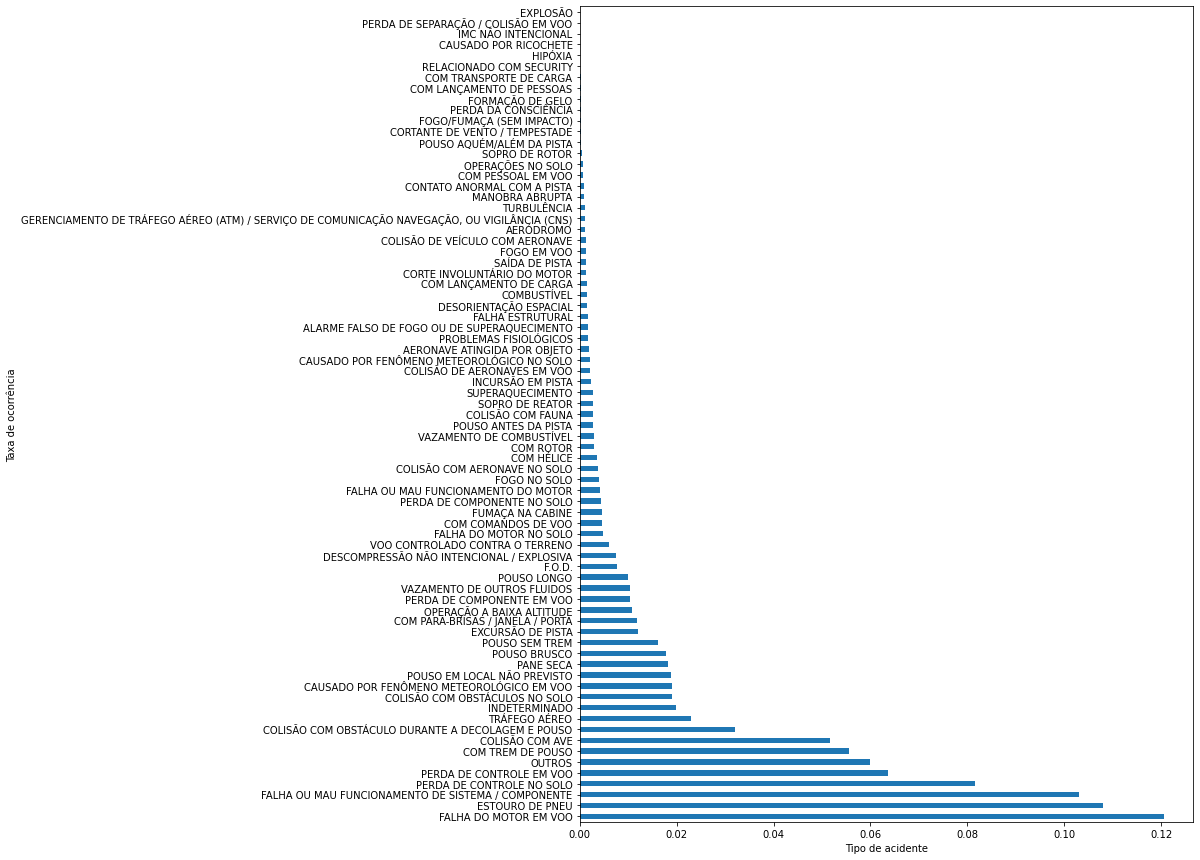

In [ ]:

fig, axes = plt.subplots(figsize=(11,15))

descricao_acda.sort_values(ascending=False).plot(kind='barh')

axes.set_xlabel('Tipo de acidente')
axes.set_ylabel('Taxa de ocorrência')
                   
plt.show()
plt.close()

Novamente foi utilizado a biblioteca Matplotlib para fazer a apresentação do gráfico acima. E analisando o gráfico, chegamos a uma conclusão de que, de todos os tipos de acidentes, a falha do motor durante o voo tem sido a maior causa dos acidentes aéreos, seguido do estouro do pneu do avião, impossibilitando/interferindo o seu pouso.

In [ ]:
# print(acidentes_aereos['estado'].unique())  
for acda in acidentes_aereos['estado'].unique():  
  print(acda + ' :' +
          str(acidentes_aereos['estado'][
              acidentes_aereos['estado'] == acda].count()))


PA :263
PR :441
MS :132
GO :286
RS :334
MG :482
AM :217
TO :46
RJ :480
AC :54
SP :1239
SC :166
MT :255
BA :200
PE :90
DF :129
CE :78
ES :70
MA :68
RR :49
AP :9
AL :30
RO :30
SE :21
PB :23
PI :36
RN :14


In [ ]:
acidentes_aereos_estado = {}  
for acda in acidentes_aereos['estado'].unique(): 
  acidentes_aereos_estado[acda] = acidentes_aereos['estado'][
                               acidentes_aereos['estado'] == acda
                                ].count()  /acidentes_aereos['estado'].count()
    
estado_acda = pd.Series(acidentes_aereos_estado)

estado_acda.head()

PA    0.050172
PR    0.084128
MS    0.025181
GO    0.054559
RS    0.063716
dtype: float64

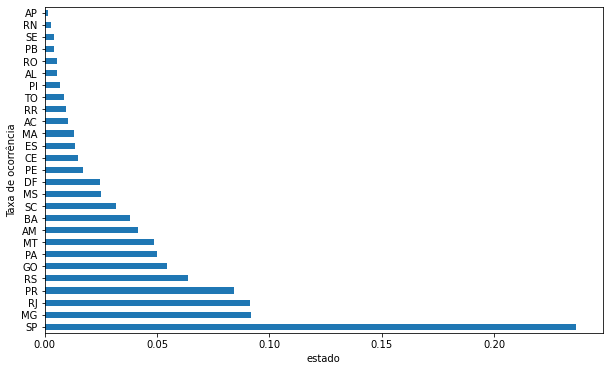

In [ ]:
fig, axes = plt.subplots(figsize=(10.,6.))

estado_acda.sort_values(ascending=False).plot(kind='barh')

axes.set_xlabel('estado')
axes.set_ylabel('Taxa de ocorrência')
                   
plt.show()
plt.close()

### Média, Moda, Media e Desvio Padrão

In [ ]:
acidentes_aereos.describe()

,codigo,ano,aeronaves_envolvidas,aeronave_assentos,aeronave_ano_fabricacao
count,5242.000000,5242.000000,5242.000000,5242.000000,5242.000000
mean,56472.458985,2014.180847,1.011828,27.575353,1863.320870
std,13045.616926,2.849750,0.111593,54.528085,507.051481
min,39115.000000,2010.000000,1.000000,0.000000,0.000000
25%,46024.500000,2012.000000,1.000000,2.000000,1978.000000
50%,51693.500000,2014.000000,1.000000,6.000000,1992.000000
75%,66450.750000,2017.000000,1.000000,10.000000,2007.000000
max,79227.000000,2019.000000,3.000000,384.000000,9999.000000


In [ ]:
for acda in acidentes_aereos['aeronave_nivel_dano'].unique():  
  print(acda + ' :' +
          str(acidentes_aereos['aeronave_nivel_dano'][
              acidentes_aereos['aeronave_nivel_dano'] == acda].count()))

LEVE :1529
SUBSTANCIAL :1515
DESTRUÍDA :329
NENHUM :1827
INDETERMINADO :42


In [ ]:
acidentes_modelo= pd.DataFrame(acidentes_aereos.groupby(['aeronave_nivel_dano']).sum()['aeronaves_envolvidas']).unstack()

### Média, Moda, Media e Desvio Padrão

In [ ]:
acidentes_modelo.describe()

count       5.000000
mean     1060.800000
std       814.616597
min        43.000000
25%       333.000000
50%      1521.000000
75%      1544.000000
max      1863.000000
dtype: float64

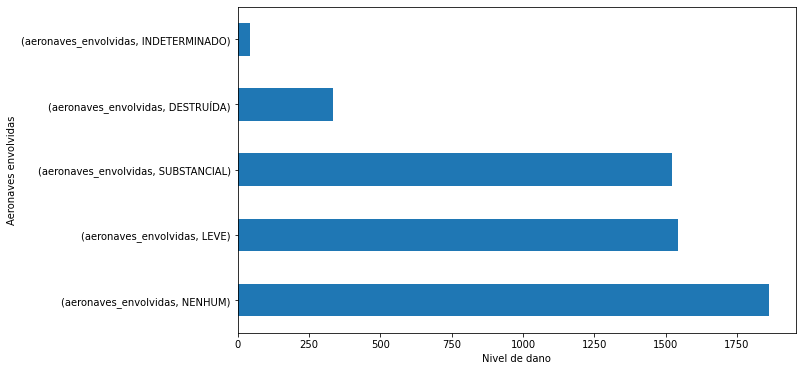

In [ ]:
fig, axes = plt.subplots(figsize=(10.,6.))

acidentes_modelo.sort_values(ascending=False).plot(kind='barh')

axes.set_xlabel('Nivel de dano')
axes.set_ylabel('Aeronaves envolvidas')
                   
plt.show()
plt.close()

### Tratamento dos dados

In [ ]:
one_hot_enc = OneHotEncoder(cols=['aeronave_liberada'])

In [ ]:
orc_enc = OrdinalEncoder(cols=['tipo', 'estado', 'descricao','cidade', 'motor_tipo','aeronave_motor_quantidade','aeronave_fabricante'])

In [ ]:
dados_acidentes_cats_ohe = one_hot_enc.fit_transform(acidentes_aereos)

In [ ]:
dados_acidentes_tratado=orc_enc.fit_transform(dados_acidentes_cats_ohe)

In [ ]:
quantidade_de_motor = acidentes_aereos[['aeronave_motor_quantidade', 'aeronaves_envolvidas','aeronave_pais_fabricante']].groupby(['aeronave_motor_quantidade','aeronave_pais_fabricante'], as_index = True).sum()

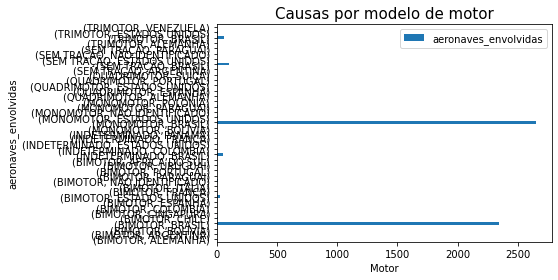

In [ ]:
quantidade_de_motor.plot(kind='barh')
plt.rcParams['figure.figsize'] = (15,10)
plt.title('Causas por modelo de motor', fontdict={'fontsize': 15})
plt.xlabel('Motor')
plt.ylabel('aeronaves_envolvidas')
plt.show()



### Média, Moda, Media e Desvio Padrão

In [ ]:
quantidade_de_motor.describe()

,aeronaves_envolvidas
count,41.000000
mean,129.365854
std,543.905771
min,1.000000
25%,1.000000
50%,2.000000
75%,5.000000
max,2650.000000


In [ ]:
acidentes_por_ano = acidentes_aereos[['ano','tipo','aeronave_assentos']].groupby(['tipo', 'ano'], as_index = False).median()

In [ ]:
acidentes_por_ano.head(26)

,tipo,ano,aeronave_assentos
0,ACIDENTE,2010,4.0
1,ACIDENTE,2011,2.0
2,ACIDENTE,2012,4.0
3,ACIDENTE,2013,2.0
4,ACIDENTE,2014,2.0
5,ACIDENTE,2015,2.0
6,ACIDENTE,2016,2.0
7,ACIDENTE,2017,2.0
8,ACIDENTE,2018,2.0
9,ACIDENTE,2019,2.0


In [ ]:
px.bar(acidentes_por_ano, x = 'ano', y = 'aeronave_assentos', color = 'tipo', title='Tipo de acidente por média de assentos ')

### Média, Moda, Media e Desvio Padrão de Acidentes por Ano

In [ ]:
acidentes_por_ano.describe()

,ano,aeronave_assentos
count,30.000000,30.000000
mean,2014.500000,5.050000
std,2.921384,2.379329
min,2010.000000,2.000000
25%,2012.000000,2.500000
50%,2014.500000,5.500000
75%,2017.000000,6.875000
max,2019.000000,10.000000


In [ ]:
acidentes_aereos['data'] = pd.to_datetime(acidentes_aereos['data'])
acidentes_ano = acidentes_aereos['Ano'] = acidentes_aereos['data'].map(lambda x: x.year)

### Acidentes ocorridos por ano

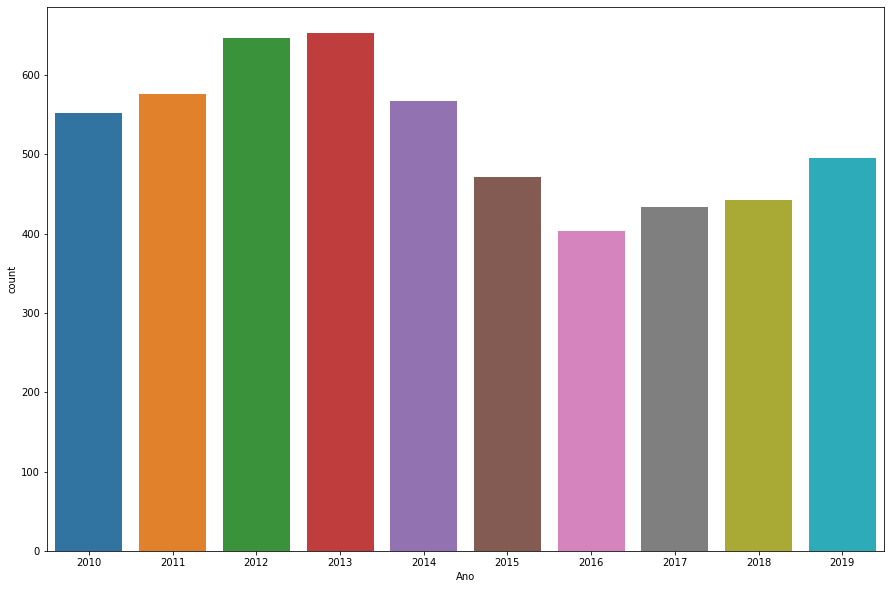

In [ ]:
figure()
countplot(data=acidentes_aereos,x='Ano')
show()

### Quais fabricantes mais apresentam problemas

In [ ]:
fabricantes = acidentes_aereos['aeronave_fabricante'].value_counts().head(10)


(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 <a list of 10 Text major ticklabel objects>)

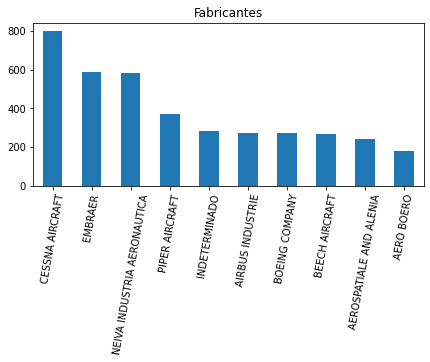

In [ ]:
fabricantes.plot(kind='bar', subplots=True, label="Fabricantes" ,figsize=(7, 3))
plt.xticks(rotation=80)

### média, moda, media e desvio padrão

In [ ]:
fabricantes.describe()

count     10.00000
mean     386.50000
std      201.33016
min      179.00000
25%      268.25000
50%      279.50000
75%      530.50000
max      800.00000
Name: aeronave_fabricante, dtype: float64

### aviação que mais registram ocorrências

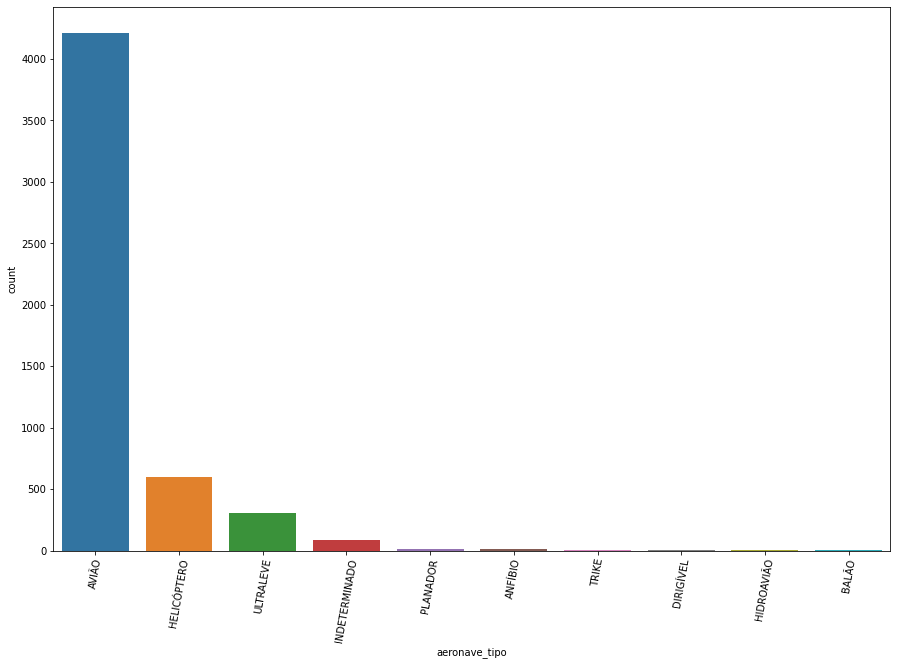

In [ ]:
figure()
countplot(data=acidentes_aereos,x='aeronave_tipo', order = acidentes_aereos['aeronave_tipo'].value_counts().index)
plt.xticks(rotation=80)
show()

In [ ]:
tipo_aero = acidentes_aereos['aeronave_tipo'].value_counts().head(10)

### Média, Moda, Media e Desvio Padrão

In [ ]:
tipo_aero.describe()

count      10.000000
mean      524.200000
std      1310.816946
min         1.000000
25%         2.000000
50%        13.500000
75%       252.500000
max      4213.000000
Name: aeronave_tipo, dtype: float64

In [ ]:
def tem_numero(string): 
  return any(char.isdigit() for char in string)

def remove_repetidos(array): 
    l = []
    for i in array:
        if i not in l:
            l.append(i)
    l.sort()
    return l

def numero_em_cima(rects, ax):
    for rect in rects:
        height = rect.get_height()
        ax.annotate('{}'.format(height),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),  
                    textcoords="offset points",
                    ha='center', va='bottom')

In [ ]:
dic_regioes = {'Nordeste': ['AL', 'BA', 'CE', 'MA', 'PB', 'PE', 'PI', 'RN', 'SE'],
                'Norte': ['AM', 'RR', 'AP', 'PA', 'TO', 'RO', 'AC'],
                'Centro Oeste': ['MT', 'MS', 'GO'], 
                'Sudeste': ['SP', 'RJ', 'ES', 'MG'],
                'Sul': ['PR', 'RS', 'SC']}
tipos = ['ACIDENTE','INCIDENTE GRAVE']
dic_01 = {i: [ len([k for k in list(acidentes_aereos.loc[acidentes_aereos['tipo'] == i, ['estado']]['estado'])
                    if k in dic_regioes[j]]) for j in dic_regioes.keys()] for i in tipos}

dic_01['tipo'] = list(dic_regioes.keys())
dados_regioes = pd.DataFrame(dic_01)
dados_regioes

,ACIDENTE,INCIDENTE GRAVE,tipo
0,166,84,Nordeste
1,259,93,Norte
2,344,111,Centro Oeste
3,563,246,Sudeste
4,355,112,Sul


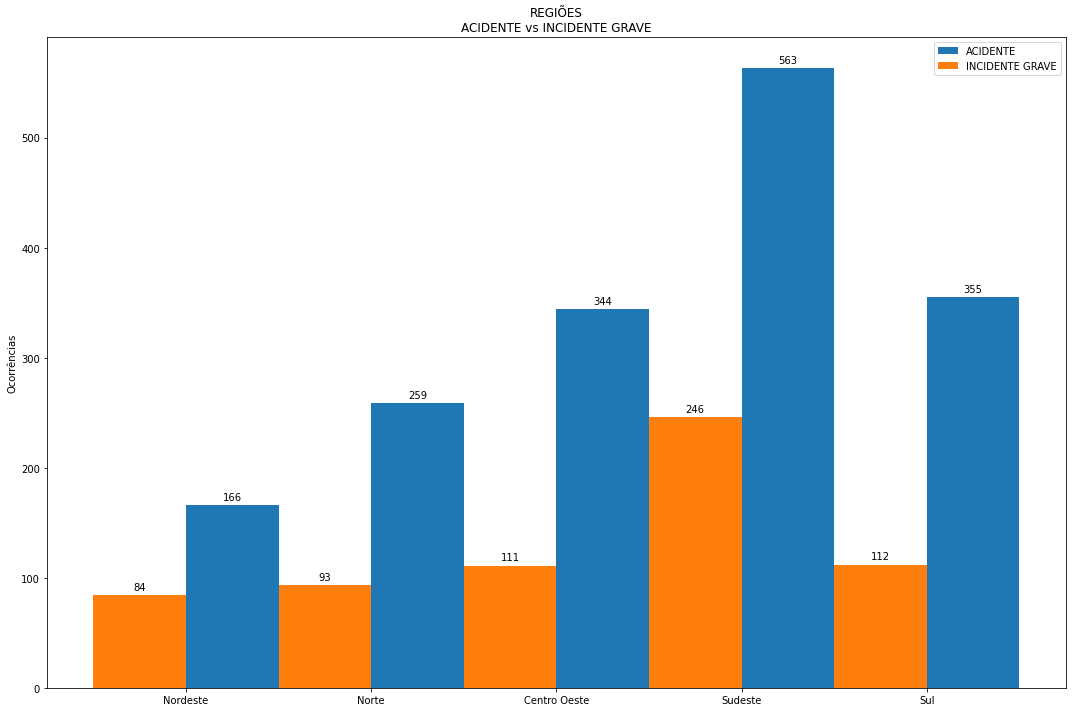

In [ ]:
x = np.arange(5)
width = 0.50

fig, ax = plt.subplots()
rects1 = ax.bar(x + width/2, dados_regioes['ACIDENTE'], width, label='ACIDENTE')
rects2 = ax.bar(x - width/2, dados_regioes['INCIDENTE GRAVE'], width, label='INCIDENTE GRAVE')

ax.set_ylabel('Ocorrências')
ax.set_title('REGIÕES\nACIDENTE vs INCIDENTE GRAVE')
ax.set_xticks(x)
ax.set_xticklabels(dados_regioes['tipo'])
ax.legend()

numero_em_cima(rects1, ax)
numero_em_cima(rects2, ax)


fig.tight_layout()

plt.show()



### Média, Moda, Media e Desvio Padrão

In [ ]:
dados_regioes.describe()

,ACIDENTE,INCIDENTE GRAVE
count,5.000000,5.000000
mean,337.400000,129.200000
std,147.286456,66.375447
min,166.000000,84.000000
25%,259.000000,93.000000
50%,344.000000,111.000000
75%,355.000000,112.000000
max,563.000000,246.000000


### Quantidade de acidentes por cidades

In [ ]:
cidade = acidentes_aereos['cidade'].value_counts().head(10)

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 <a list of 10 Text major ticklabel objects>)

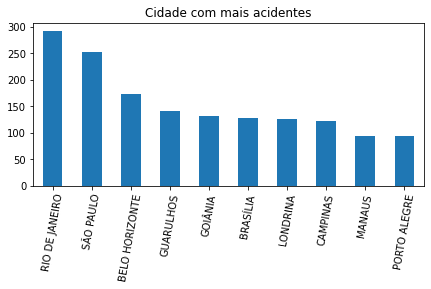

In [ ]:
cidade.plot(kind='bar', subplots=True, label="Cidade com mais acidentes" ,figsize=(7, 3))
plt.xticks(rotation=80)

### Média, Moda, Media e Desvio Padrão

In [ ]:
cidade.describe()

count     10.000000
mean     155.900000
std       66.158816
min       94.000000
25%      123.750000
50%      130.500000
75%      165.750000
max      293.000000
Name: cidade, dtype: float64

### Acidentes por liberação da aeronave

In [ ]:
liberacao = acidentes_aereos['aeronave_liberada'].value_counts().head(10)

(array([0, 1, 2]), <a list of 3 Text major ticklabel objects>)

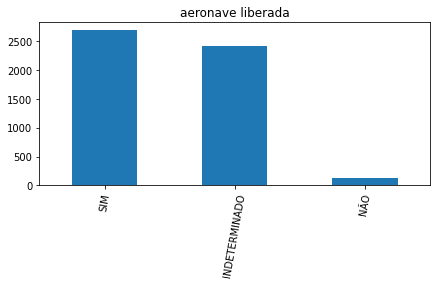

In [ ]:
liberacao.plot(kind='bar', subplots=True, label="aeronave liberada" ,figsize=(7, 3))
plt.xticks(rotation=80)

### Média, Moda, Media e Desvio Padrão

In [ ]:
liberacao.describe()

count       3.000000
mean     1747.333333
std      1401.874578
min       136.000000
25%      1277.500000
50%      2419.000000
75%      2553.000000
max      2687.000000
Name: aeronave_liberada, dtype: float64

### Horário que mais ocorreram acidentes

In [ ]:
horario = acidentes_aereos['hora'].value_counts().head(10)

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 <a list of 10 Text major ticklabel objects>)

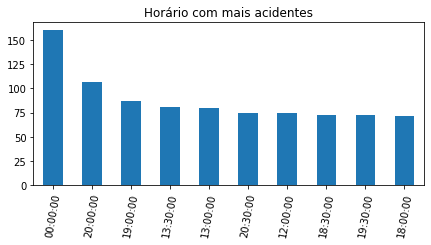

In [ ]:
horario.plot(kind='bar', subplots=True, label="Horário com mais acidentes" ,figsize=(7, 3))
plt.xticks(rotation=80)

### Média, Moda, Media e Desvio Padrão

In [ ]:
horario.describe()

count     10.000000
mean      88.300000
std       27.288785
min       72.000000
25%       73.500000
50%       77.500000
75%       85.500000
max      160.000000
Name: hora, dtype: float64

### Status da investigação

In [ ]:
status = acidentes_aereos['status_investigacao'].value_counts().head(10)

(array([0, 1, 2]), <a list of 3 Text major ticklabel objects>)

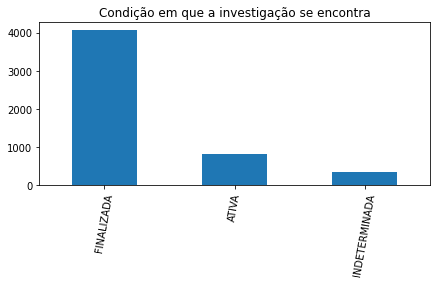

In [ ]:
status.plot(kind='bar', subplots=True, label="Condição em que a investigação se encontra" ,figsize=(7, 3))
plt.xticks(rotation=80)

### Média, Moda, Media e Desvio Padrão



In [ ]:
status.describe()

count       3.000000
mean     1747.333333
std      2020.926850
min       360.000000
25%       588.000000
50%       816.000000
75%      2441.000000
max      4066.000000
Name: status_investigacao, dtype: float64

### Acidente ocorreu na saida da pista

In [ ]:
ocorrencia = acidentes_aereos['ocorrencia_saida_pista'].value_counts().head(10)

(array([0, 1]), <a list of 2 Text major ticklabel objects>)

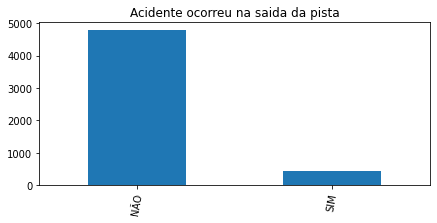

In [ ]:
ocorrencia.plot(kind='bar', subplots=True, label="Acidente ocorreu na saida da pista" ,figsize=(7, 3))
plt.xticks(rotation=80)

### Média, Moda, Media e Desvio Padrão

In [ ]:
ocorrencia.describe()

count       2.000000
mean     2621.000000
std      3058.943935
min       458.000000
25%      1539.500000
50%      2621.000000
75%      3702.500000
max      4784.000000
Name: ocorrencia_saida_pista, dtype: float64

### Modelo do motor que ocasionou o acidente

In [ ]:
tipo_de_motor = acidentes_aereos['motor_tipo'].value_counts().head(10)

(array([0, 1, 2, 3, 4, 5]), <a list of 6 Text major ticklabel objects>)

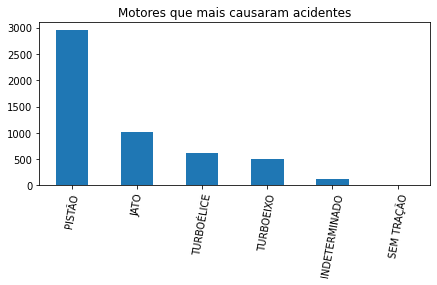

In [ ]:
tipo_de_motor.plot(kind='bar', subplots=True, label="Motores que mais causaram acidentes" ,figsize=(7, 3))
plt.xticks(rotation=80)

### Média, Moda, Media e Desvio Padrão

In [ ]:
tipo_de_motor.describe()

count       6.000000
mean      873.666667
std      1079.639508
min        15.000000
25%       224.250000
50%       563.000000
75%       919.000000
max      2952.000000
Name: motor_tipo, dtype: float64

### Ano de Fabricação das aeronaves que mais causaram acidentes

In [ ]:
ano_tratado =acidentes_aereos['aeronave_ano_fabricacao'].replace(0, method='bfill')

In [ ]:
ano_de_fabricacao = ano_tratado.value_counts().head(10)

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 <a list of 10 Text major ticklabel objects>)

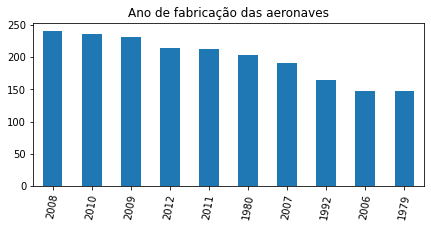

In [ ]:
ano_de_fabricacao.plot(kind='bar', subplots=True, label="Ano de fabricação das aeronaves" ,figsize=(7, 3))
plt.xticks(rotation=80)

### Média, Moda, Media e Desvio Padrão

In [ ]:
ano_de_fabricacao.describe()

count     10.00000
mean     206.00000
std       56.50762
min      136.00000
25%      182.00000
50%      195.50000
75%      219.00000
max      345.00000
Name: aeronave_ano_fabricacao, dtype: float64

### Fase em que o acidente ocorreu 

In [ ]:
fase_fabricacao = acidentes_aereos['aeronave_fase_operacao'].value_counts().head(10)

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 <a list of 10 Text major ticklabel objects>)

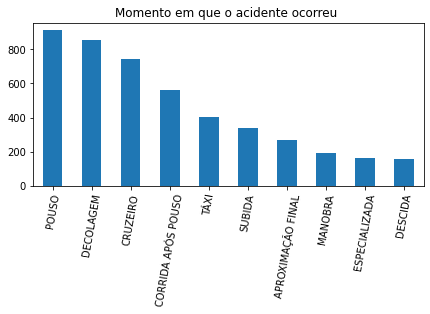

In [ ]:
fase_fabricacao.plot(kind='bar', subplots=True, label="Momento em que o acidente ocorreu " ,figsize=(7, 3))
plt.xticks(rotation=80)

### Média, Moda, Media e Desvio Padrão

In [ ]:
fase_fabricacao.describe()

count     10.000000
mean     458.400000
std      289.777002
min      155.000000
25%      212.000000
50%      371.500000
75%      698.000000
max      910.000000
Name: aeronave_fase_operacao, dtype: float64

### Regressão linear da quantidade de assentos pelo ano do acidente

In [ ]:
x = dados_acidentes_tratado.iloc[:, 18].values
y = dados_acidentes_tratado.iloc[:, 6].values

In [ ]:
correlacao = np.corrcoef(x, y)
x = x.reshape(-1, 1)

In [ ]:
regressor = LinearRegression()
regressor.fit(x, y)
regressor.coef_

array([-0.00129425])

Text(0, 0.5, 'Ano do acidente')

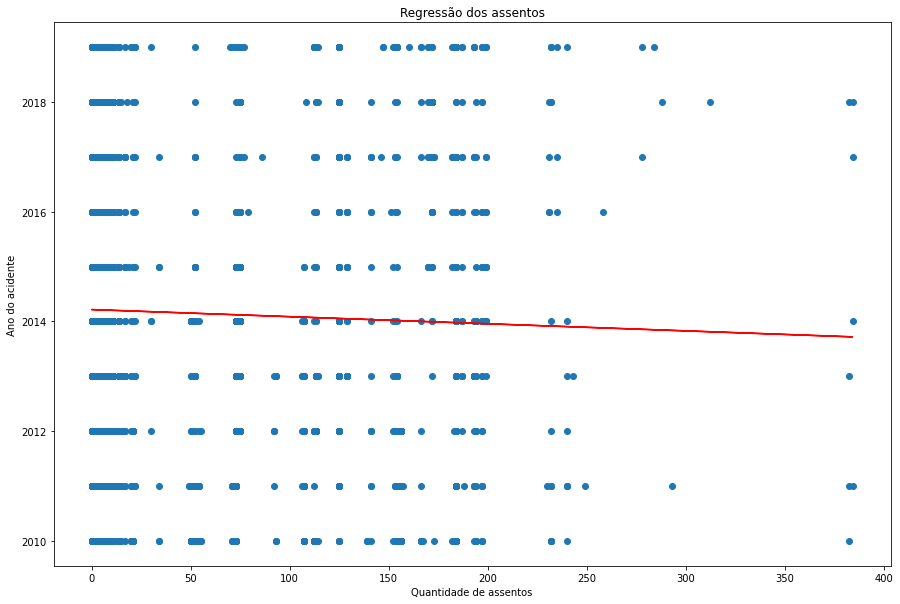

In [ ]:
plt.scatter(x, y)
plt.plot(x, regressor.predict(x), color = 'red')
plt.title('Regressão dos assentos')
plt.xlabel('Quantidade de assentos')
plt.ylabel('Ano do acidente')

#Conclusão

É fato que tem acontecido muitos acidentes em tão pouco tempo, visto que as viagens aéreas são consideradas as mais seguras, mas por que o voo aéreo tem deixado de ser seguro assim? A resposta é que ela não deixou de ser segura, e sim, por falta de manutenções no veículo, falha humana ou até mesmo a falta de qualidade na entrega dos veículos são os causadores desses acidentes.

De acordo o estudo acima, analisando os fatos entre 2010 e 2019, o ano que teve mais acidentes foi em 2016, com mais de 600 acidentes. A maioria dos acidentes têm se dado por falhas mecânicas nos aviões, ou seja, estão saindo de fábrica sem a qualidade esperada ou faltas de manutenções estão levando ao erro? Vale lembrar que os motores que têm apresentado mais falhas são os brasileiros. Em seguida, outro grande causador dos acidentes tem sido a falha humana, que tem se dado por perda de controle no pouso e durante o voo, colisão com obstáculos durante o pouso e durante a decolagem etc. Infelizmente o estado que mais tem sofrido com isso é São Paulo, seguido de Minas Gerais.

Com isso chegamos a conclusão que, visto a tecnologia que nós temos hoje, falhas mecânicas e erros humanos assim já podiam ser cada vez mais evitados, incluindo a não utilização dos aviões que mais têm causado acidentes, que são os Monomotores e Bimotores, ambos já "ultrapassados" comparado a nossa realidade. Os motores brasileiros devem ser mais qualificados ou deverá ser avaliada a utilização somente de motores fábricados fora do Brasil.

#Referência Bibliográfica
* An introduction to seaborn. Seaborn, 2012. Disponível em: https://towardsdatascience.com/seaborn-python-8563c3d0ad41. Acesso em: 18 de Novembro de 2021.

* Category Encoders. Category Encoders, 2016. Disponível em: https://contrib.scikit-learn.org/category_encoders/. Acesso em: 18 de Novembro de 2021.

* Getting Started. Plotly. Disponível em: https://plotly.com/python/. Acesso em: 18 de Novembro de 2021.

* Matplotlib Documentação. Matplotlib, 2021. Disponível em: https://matplotlib.org/stable/index.html#. Acesso em: 18 de Novembro de 2021.

* Visão geral do pacote. Pandas, 2011. Disponível em:https://pandas.pydata.org/docs/getting_started/overview.html. Acesso em: 18 de Novembro de 2021.

* Whats is NumPy?. Numpy, 2021. Disponível em: https://numpy.org/doc/stable/user/whatisnumpy.html. Acesso em: 18 de Novembro de 2021. 

